## Finding overlapping TADs 2 tools 5kb

In [5]:
import os
wd = '/scratch/ak8725/az_mrg/TADs_boundaries'
os.chdir(wd)

In [10]:
#extract 0lvl hitad TADs
input_file = "IR64_new_hitad2kb.txt"
output_file = "IR64_new_hitad2kb_0lvl.txt"

# Read the input file and filter rows with 0 in the last column
filtered_rows = []
with open(input_file, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        if int(parts[-1]) == 0:
            filtered_rows.append(line)

# Write the filtered rows to the output file
with open(output_file, "w") as f:
    f.writelines(filtered_rows)

In [7]:
import matplotlib.pyplot as plt
import pybedtools
from pybedtools import BedTool
import numpy as np

In [8]:
a = BedTool('../hicFindTADs/hicFindTADs13_out/az_5kb_domains.bed')
b = BedTool('../hitad/az_hitad5kb_0lvl.txt')

In [9]:
#find features in a that intersect at least 80 percent reciprocally with features in b, return TAD positions as they are in a
d = a.intersect(b, u=True, f=0.8, F=0.8, nonamecheck=True)
print('Number of HicExplorer TADs is ' + str(len(a)))
print('Number of HiTAD TADs is ' + str(len(b)))
print('Number of HiCExplorer and HiTAD overlapping TADs is ' + str(len(d)))
#saving intersect file to bed
d = d.moveto('az_TADs_5kb_two_tools_80.bed')

Number of HicExplorer TADs is 3954
Number of HiTAD TADs is 3534
Number of HiCExplorer and HiTAD overlapping TADs is 1207


In [10]:
#median size calculation
sizes = [len(i) for i in d]
import statistics
res = statistics.median(sizes)
print("Median TAD size is : " + str(res))

Median TAD size is : 65000


## Finding overlapping TADs 2 tools 2kb

In [11]:
e = BedTool('../hicFindTADs/hicFindTADs1_out/az_2kb_domains.bed')
f = BedTool('../hitad/az_hitad2kb_0lvl.txt')

In [12]:
#find features in a that intersect at least 80 percent reciprocally with features in b, return TAD positions as they are in a
g = e.intersect(f, u=True, f=0.8, F=0.8, nonamecheck=True)
print('Number of HicExplorer TADs is ' + str(len(e)))
print('Number of HiTAD TADs is ' + str(len(f)))
print('Number of HiCExplorer and HiTAD overlapping TADs is ' + str(len(g)))
#saving intersect file to bed
g = g.moveto('az_TADs_2kb_two_tools_80.bed')

Number of HicExplorer TADs is 6420
Number of HiTAD TADs is 6535
Number of HiCExplorer and HiTAD overlapping TADs is 2474


In [13]:
#median size calculation
sizes = [len(i) for i in g]
import statistics
res = statistics.median(sizes)
print("Median TAD size is : " + str(res))

Median TAD size is : 44000.0


## 1kb HiCExplorer TADs

In [14]:
k = BedTool('../hicFindTADs/hicFindTADs2_out/az_1kb_domains.bed')
print('Number of HicExplorer TADs is ' + str(len(k)))

#median size calculation
sizes = [len(i) for i in k]
import statistics
res = statistics.median(sizes)
print("Median TAD size is : " + str(res))

Number of HicExplorer TADs is 4650
Median TAD size is : 52000.0


## Plotting results

In [15]:
%%capture
!pip install matplotlib-venn

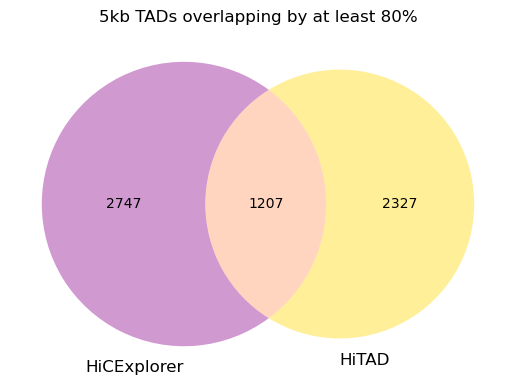

In [16]:
#Venn diagram for 80% overlapping 5kb TADs
import matplotlib_venn
from matplotlib_venn import venn2
venn2(subsets = (3954-1207,3534-1207,1207), set_labels = ('HiCExplorer', 'HiTAD'), set_colors=('darkmagenta', 'gold'))
plt.title('5kb TADs overlapping by at least 80%')
plt.savefig('80%_overlap_two_tools_5kb_venn')
plt.show()

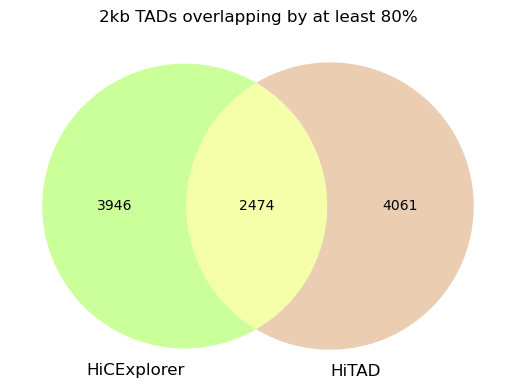

In [17]:
#Venn diagram for 80% overlapping 2kb TADs
venn2(subsets = (6420-2474,6535-2474,2474), set_labels = ('HiCExplorer', 'HiTAD'), set_colors=('chartreuse', 'peru'))
plt.title('2kb TADs overlapping by at least 80%')
plt.savefig('80%_overlap_two_tools_2kb_venn')
plt.show()

## TAD size distributions

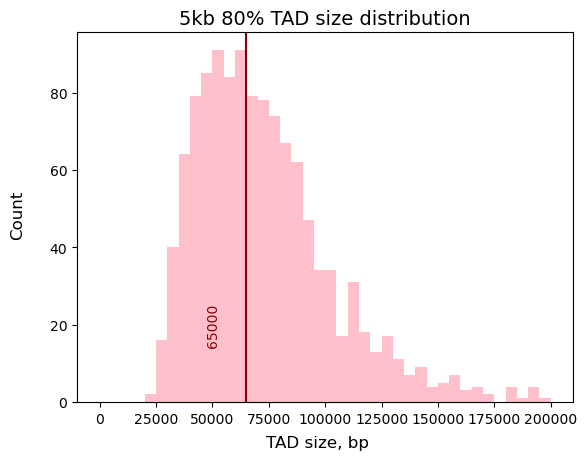

In [18]:
#Size distribution of 5kb 80% TADs
intersect80 = [len(i) for i in pybedtools.BedTool(d)]

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(intersect80, bins=40, range=[0,200000], color='pink')
plt.title('5kb 80% TAD size distribution', size=14)
plt.axvline(x=65000.0, color='darkred')
plt.text(47000, 15, "65000", rotation=90, color='darkred', size=10)

fig.supylabel('Count',size=12)
fig.supxlabel('TAD size, bp',size=12)
plt.savefig('TAD_2_tools_intersect_5kb_sizes.png')
plt.show()

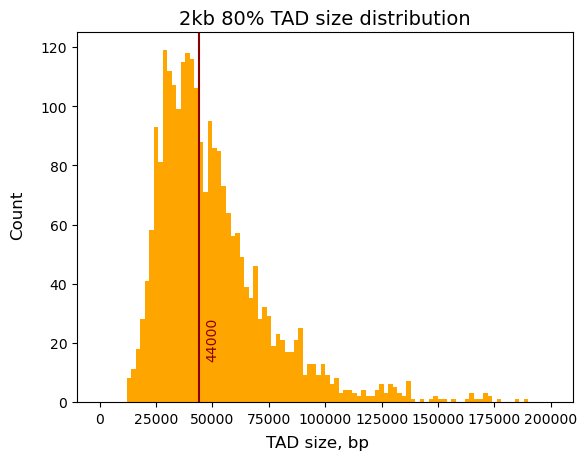

In [19]:
#Size distribution of 2kb 80% TADs
intersect80 = [len(i) for i in pybedtools.BedTool(g)]

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(intersect80, bins=100, range=[0,200000], color='orange')
plt.title('2kb 80% TAD size distribution', size=14)
plt.axvline(x=44000.0, color='darkred')
plt.text(47000, 15, "44000", rotation=90, color='darkred', size=10)

fig.supylabel('Count',size=12)
fig.supxlabel('TAD size, bp',size=12)
plt.savefig('TAD_2_tools_intersect_2kb_sizes.png')
plt.show()

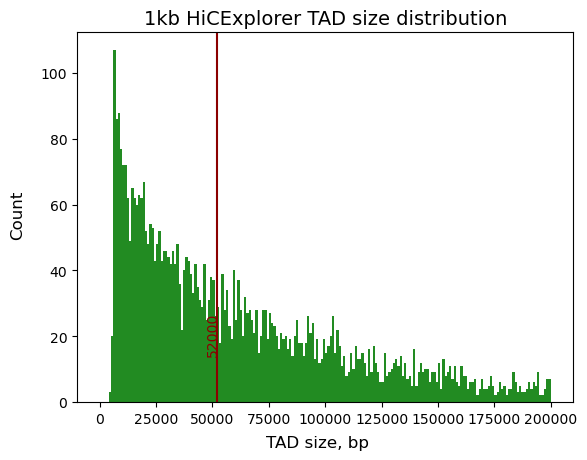

In [20]:
#Size distribution of 1kb HiCExplorer TADs
intersect80 = [len(i) for i in pybedtools.BedTool(k)]

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(intersect80, bins=200, range=[0,200000], color='forestgreen')
plt.title('1kb HiCExplorer TAD size distribution', size=14)
plt.axvline(x=52000.0, color='darkred')
plt.text(47000, 15, "52000", rotation=90, color='darkred', size=10)

fig.supylabel('Count',size=12)
fig.supxlabel('TAD size, bp',size=12)
plt.savefig('TAD_1kb_sizes.png')
plt.show()

## TAD genome coverages

In [21]:
#Percentage of the genome covered by 5kb TADs
sizes5_hicex = [len(i) for i in pybedtools.BedTool(a)]
res5_hicex=(sum(sizes5_hicex)/379100000)*100
sizes5_hitad = [len(i) for i in pybedtools.BedTool(b)]
res5_hitad=(sum(sizes5_hitad)/379100000)*100
print("Percentage of the genome covered by HiCExplorer 5kb TADs : " + str(res5_hicex))
print("Percentage of the genome covered by HiTAD 5kb TADs : " + str(res5_hitad))

sizes5_80 = [len(i) for i in pybedtools.BedTool(d)]
res5_80=(sum(sizes5_80)/379100000)*100
print("Percentage of the genome covered by 5kb TADs overlapping by 80% : " + str(res5_80))

Percentage of the genome covered by HiCExplorer 5kb TADs : 99.21656554998681
Percentage of the genome covered by HiTAD 5kb TADs : 96.54576628857822
Percentage of the genome covered by 5kb TADs overlapping by 80% : 23.562384595093643


In [22]:
#Percentage of the genome covered by 2kb TADs
sizes2_hicex = [len(i) for i in pybedtools.BedTool(e)]
res2_hicex=(sum(sizes2_hicex)/379100000)*100
sizes2_hitad = [len(i) for i in pybedtools.BedTool(f)]
res2_hitad=(sum(sizes2_hitad)/379100000)*100
print("Percentage of the genome covered by HiCExplorer 5kb TADs : " + str(res2_hicex))
print("Percentage of the genome covered by HiTAD 5kb TADs : " + str(res2_hitad))

sizes2_80 = [len(i) for i in pybedtools.BedTool(g)]
res2_80=(sum(sizes2_80)/379100000)*100
print("Percentage of the genome covered by 5kb TADs overlapping by 80% : " + str(res2_80))

Percentage of the genome covered by HiCExplorer 5kb TADs : 99.55183328936957
Percentage of the genome covered by HiTAD 5kb TADs : 98.07174887892377
Percentage of the genome covered by 5kb TADs overlapping by 80% : 32.33394882616724


In [49]:
sizes = [len(i) for i in pybedtools.BedTool(k)]
res=(sum(sizes)/379100000)*100
print("Percentage of the genome covered by 1kb HiCExplorer TADs : " + str(res))

Percentage of the genome covered by 1kb HiCExplorer TADs : 99.25771564231074


## Extracting boundaries for overlapping TADs

In [50]:
#2kb overlapping TAD boundaries

def process_bed_file(input_file, output_file):
    # Dictionary to store the transformed entries
    transformed_entries = {}

    with open(input_file, 'r') as infile:
        for line in infile:
            # Split the line into columns
            cols = line.strip().split('\t')

            # Get the original values
            col1, col2, col3 = cols[0], int(cols[1]), int(cols[2])

            # Create two rows for each entry with the specified structure
            rows = [
                (col1, col2 - 1000, col2 + 1000),
                (col1, col3 - 1000, col3 + 1000)
            ]

            # Add the transformed rows to the dictionary
            for row in rows:
                transformed_entries[row] = 1

    # Sort the unique transformed entries
    sorted_entries = sorted(transformed_entries.keys(), key=lambda x: (x[0], x[1]))

    # Write the sorted entries to the output file
    with open(output_file, 'w') as outfile:
        for entry in sorted_entries:
            outfile.write(f"{entry[0]}\t{entry[1]}\t{entry[2]}\n")

if __name__ == "__main__":
    input_file = 'az_TADs_2kb_two_tools_80.bed'
    output_file = 'az_boundaries_2kb_two_tools_80.bed'
    process_bed_file(input_file, output_file)

In [52]:
!wc -l az_boundaries_2kb_two_tools_80.bed

3626 az_boundaries_2kb_two_tools_80.bed


In [51]:
#5kb overlapping TAD boundaries

def process_bed_file(input_file, output_file):
    # Dictionary to store the transformed entries
    transformed_entries = {}

    with open(input_file, 'r') as infile:
        for line in infile:
            # Split the line into columns
            cols = line.strip().split('\t')

            # Get the original values
            col1, col2, col3 = cols[0], int(cols[1]), int(cols[2])

            # Create two rows for each entry with the specified structure
            rows = [
                (col1, col2 - 1000, col2 + 1000),
                (col1, col3 - 1000, col3 + 1000)
            ]

            # Add the transformed rows to the dictionary
            for row in rows:
                transformed_entries[row] = 1

    # Sort the unique transformed entries
    sorted_entries = sorted(transformed_entries.keys(), key=lambda x: (x[0], x[1]))

    # Write the sorted entries to the output file
    with open(output_file, 'w') as outfile:
        for entry in sorted_entries:
            outfile.write(f"{entry[0]}\t{entry[1]}\t{entry[2]}\n")

if __name__ == "__main__":
    input_file = 'az_TADs_5kb_two_tools_80.bed'
    output_file = 'az_boundaries_5kb_two_tools_80.bed'
    process_bed_file(input_file, output_file)

In [53]:
!wc -l az_boundaries_5kb_two_tools_80.bed

1818 az_boundaries_5kb_two_tools_80.bed
